## データ読み込み

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/anaiyoshikazu/stock_docu/datasets/時価総額上位500社 - シート1.csv')

df.columns

Index(['銘柄コード', '会社名', '時価総額', 'PER(会予)', 'PBR', '配当利回り(会予)', '売上高', '売上総利益率',
       '営業CF/売上比率', '販管費/売上比率', '営業利益', '営業利益率', '当期純利益', '純利益率', 'ROE',
       '自己資本比率', '有利子負債/総資産', '有利子負債/時価総額', '純有利子負債/時価総額', 'DEレシオ', '流動比率',
       '総資産', '現金及び預金', '売上債権', '売上債権回転数', '棚卸資産', '棚卸資産回転数', '有形固定資産', '固定負債',
       '有利子負債', '純有利子負債', '純資産', '自己資本', 'フリーCF', '研究開発/売上比率'],
      dtype='object')

## 前処理

In [3]:

# すでにDataFrameがあると仮定して、すべての文字列型・object型のカラムでカンマを削除
df = df.applymap(lambda x: str(x).replace(',', '') if isinstance(x, (str)) else x)

# 数値型に変換できるものは自動で変換
df = df.apply(pd.to_numeric, errors='ignore')

# 結果の確認
df.dtypes

銘柄コード           object
会社名             object
時価総額             int64
PER(会予)        float64
PBR            float64
配当利回り(会予)      float64
売上高            float64
売上総利益率         float64
営業CF/売上比率      float64
販管費/売上比率       float64
営業利益           float64
営業利益率          float64
当期純利益          float64
純利益率           float64
ROE            float64
自己資本比率         float64
有利子負債/総資産      float64
有利子負債/時価総額     float64
純有利子負債/時価総額    float64
DEレシオ          float64
流動比率           float64
総資産            float64
現金及び預金         float64
売上債権           float64
売上債権回転数        float64
棚卸資産           float64
棚卸資産回転数        float64
有形固定資産         float64
固定負債           float64
有利子負債          float64
純有利子負債         float64
純資産            float64
自己資本           float64
フリーCF            int64
研究開発/売上比率      float64
dtype: object

In [4]:
df.describe()

,時価総額,PER(会予),PBR,配当利回り(会予),売上高,売上総利益率,営業CF/売上比率,販管費/売上比率,営業利益,営業利益率,...,棚卸資産,棚卸資産回転数,有形固定資産,固定負債,有利子負債,純有利子負債,純資産,自己資本,フリーCF,研究開発/売上比率
count,5.000000e+02,449.000000,499.000000,425.000000,4.980000e+02,441.000000,494.000000,441.000000,4.470000e+02,445.000000,...,4.220000e+02,409.000000,4.880000e+02,4.540000e+02,4.560000e+02,4.930000e+02,4.990000e+02,4.990000e+02,5.000000e+02,269.000000
mean,1.676723e+06,19.337416,2.163727,2.680941,1.652706e+06,34.790249,23.325304,23.265079,1.285000e+05,11.736180,...,2.441843e+05,104.851834,5.652349e+05,7.206830e+05,3.053043e+06,2.677639e+06,1.274928e+06,1.205240e+06,1.591334e+05,3.381041
std,3.280761e+06,15.848009,2.531208,1.369199,3.255602e+06,19.568319,60.044238,16.589475,3.158023e+05,11.205304,...,4.337906e+05,103.398978,1.194488e+06,2.117139e+06,1.852662e+07,1.777095e+07,2.678407e+06,2.522465e+06,5.750419e+05,4.826502
min,4.332600e+04,3.300000,0.200000,0.000000,1.062000e+03,1.300000,0.100000,1.600000,6.800000e+01,0.000000,...,0.000000e+00,0.700000,8.000000e+00,2.590000e+02,1.100000e+01,4.240000e+02,5.246000e+03,5.176000e+03,0.000000e+00,0.000000
25%,3.356112e+05,10.800000,0.800000,1.700000,2.874800e+05,19.800000,7.350000,11.500000,2.649300e+04,5.200000,...,2.795750e+04,35.000000,7.607225e+04,3.580100e+04,3.880425e+04,5.382400e+04,2.542860e+05,2.511195e+05,1.643975e+04,0.500000
50%,5.815680e+05,15.500000,1.300000,2.600000,6.567635e+05,30.800000,11.800000,19.700000,4.756800e+04,8.900000,...,9.160150e+04,74.600000,1.945820e+05,1.333605e+05,2.047800e+05,1.563120e+05,4.927030e+05,4.783900e+05,3.833500e+04,2.000000
75%,1.386258e+06,21.000000,2.300000,3.700000,1.636422e+06,45.600000,18.025000,29.000000,1.191225e+05,13.900000,...,2.421828e+05,137.300000,5.213328e+05,4.834145e+05,9.166238e+05,6.431280e+05,1.083634e+06,1.027713e+06,9.962925e+04,4.200000
max,3.640662e+07,155.300000,21.200000,6.600000,4.509532e+07,93.800000,745.100000,136.600000,5.352934e+06,112.800000,...,4.480884e+06,667.600000,1.540482e+07,2.837688e+07,2.645351e+08,2.645351e+08,3.685653e+07,3.591027e+07,1.030767e+07,35.800000


### 外れ値の除去

In [5]:
# PER50倍より大きい銘柄を除外（特殊要因でPERがインフレしているため）
df = df[df['PER(会予)'] < 50]

df.describe()

,時価総額,PER(会予),PBR,配当利回り(会予),売上高,売上総利益率,営業CF/売上比率,販管費/売上比率,営業利益,営業利益率,...,棚卸資産,棚卸資産回転数,有形固定資産,固定負債,有利子負債,純有利子負債,純資産,自己資本,フリーCF,研究開発/売上比率
count,4.280000e+02,428.000000,427.000000,380.000000,4.270000e+02,376.000000,424.000000,376.000000,3.810000e+02,380.000000,...,3.640000e+02,354.000000,4.180000e+02,3.890000e+02,3.970000e+02,4.230000e+02,4.270000e+02,4.270000e+02,4.280000e+02,224.000000
mean,1.598794e+06,16.607243,2.018033,2.761842,1.709865e+06,33.600798,22.455896,22.068617,1.338855e+05,11.763158,...,2.496275e+05,103.533051,5.847985e+05,6.955970e+05,3.243996e+06,2.909022e+06,1.277825e+06,1.212495e+06,1.586626e+05,3.253125
std,3.106564e+06,8.339251,2.261409,1.303736,3.400144e+06,18.525764,56.929194,15.104767,3.355642e+05,11.031735,...,4.480873e+05,104.747927,1.244833e+06,2.017315e+06,1.978852e+07,1.913186e+07,2.760242e+06,2.612324e+06,6.064369e+05,4.816283
min,4.332600e+04,3.300000,0.300000,0.000000,1.299700e+04,4.000000,0.100000,1.600000,1.390000e+02,0.800000,...,7.300000e+01,0.700000,2.700000e+02,2.590000e+02,1.100000e+01,4.240000e+02,5.246000e+03,5.176000e+03,0.000000e+00,0.000000
25%,3.377355e+05,10.700000,0.800000,1.800000,2.928340e+05,19.675000,7.575000,11.400000,2.838700e+04,5.500000,...,2.803050e+04,34.225000,7.858175e+04,3.607500e+04,4.219200e+04,5.378750e+04,2.664530e+05,2.582845e+05,1.666875e+04,0.600000
50%,5.869595e+05,15.000000,1.300000,2.700000,6.616770e+05,30.450000,11.750000,18.850000,5.015600e+04,9.000000,...,9.014350e+04,73.950000,1.982445e+05,1.385250e+05,2.022650e+05,1.559930e+05,4.900670e+05,4.730490e+05,3.806850e+04,1.950000
75%,1.386258e+06,20.100000,2.200000,3.700000,1.702586e+06,43.200000,17.200000,28.000000,1.191570e+05,13.900000,...,2.428258e+05,134.450000,5.375715e+05,5.091960e+05,9.187980e+05,6.346375e+05,1.061280e+06,1.027713e+06,9.644750e+04,3.925000
max,3.640662e+07,49.800000,21.200000,6.600000,4.509532e+07,93.000000,745.100000,136.600000,5.352934e+06,112.800000,...,4.480884e+06,667.600000,1.540482e+07,2.837688e+07,2.645351e+08,2.645351e+08,3.685653e+07,3.591027e+07,1.030767e+07,35.800000


### 欠損値の穴埋め

In [6]:
df.columns

Index(['銘柄コード', '会社名', '時価総額', 'PER(会予)', 'PBR', '配当利回り(会予)', '売上高', '売上総利益率',
       '営業CF/売上比率', '販管費/売上比率', '営業利益', '営業利益率', '当期純利益', '純利益率', 'ROE',
       '自己資本比率', '有利子負債/総資産', '有利子負債/時価総額', '純有利子負債/時価総額', 'DEレシオ', '流動比率',
       '総資産', '現金及び預金', '売上債権', '売上債権回転数', '棚卸資産', '棚卸資産回転数', '有形固定資産', '固定負債',
       '有利子負債', '純有利子負債', '純資産', '自己資本', 'フリーCF', '研究開発/売上比率'],
      dtype='object')

In [7]:
df['有形固定資産'] = df['有形固定資産'].fillna(0)
df['固定負債'] = df['固定負債'].fillna(0)
df['有利子負債/総資産'] = df['有利子負債/総資産'].fillna(0)
df['有利子負債'] = df['有利子負債'].fillna(0)
df['配当利回り(会予)'].fillna(0, inplace=True)

df[['有形固定資産', '固定負債', '有利子負債/総資産', '有利子負債', '配当利回り(会予)']].isna().sum()

有形固定資産       0
固定負債         0
有利子負債/総資産    0
有利子負債        0
配当利回り(会予)    0
dtype: int64

In [8]:
df = df.dropna(subset=['現金及び預金'])

df['現金及び預金'].isna().sum()

0

## データの作成

### 固定ネットキャッシュ比率

In [9]:
# 固定ネットキャッシュ（現預金 - 固定負債）
df['固定ネットキャッシュ'] = df['現金及び預金'] - df['固定負債']
# 固定ネットキャッシュ比率（固定ネットキャッシュ / 総資産）
df['固定ネットキャッシュ比率'] = (df['固定ネットキャッシュ'] / df['総資産']) * 100

df[['会社名', '現金及び預金', '固定負債', '総資産', '固定ネットキャッシュ', 
    '固定ネットキャッシュ比率']]

,会社名,現金及び預金,固定負債,総資産,固定ネットキャッシュ,固定ネットキャッシュ比率
0,本たばこ産業,1084567.0,2373398.0,8370732.0,-1288831.0,-15.396873
2,リクルートHD,871812.0,338888.0,2908790.0,532924.0,18.321158
3,立製作所,866242.0,1345551.0,13284813.0,-479309.0,-3.607947
4,ソニーG,2491949.0,16380543.0,35991547.0,-13888594.0,-38.588489
6,三菱重工業,542003.0,1018062.0,6825215.0,-476059.0,-6.975004
...,...,...,...,...,...,...
493,三菱食品,424.0,31361.0,888315.0,-30937.0,-3.482661
494,エイチ･ツー･オーリテイリング,62108.0,207419.0,739987.0,-145311.0,-19.636967
495,イズミ,15717.0,143442.0,569611.0,-127725.0,-22.423198
496,メイテックGHD,46110.0,17449.0,84898.0,28661.0,33.759335


### ネットキャッシュ比率

In [10]:
df['ネットキャッシュ'] = df['現金及び預金'] - df['有利子負債']
df['ネットキャッシュ比率'] = (df['ネットキャッシュ'] / df['総資産']) * 100

df[['会社名', '現金及び預金', '有利子負債', 'ネットキャッシュ', '総資産', 'ネットキャッシュ比率']]

,会社名,現金及び預金,有利子負債,ネットキャッシュ,総資産,ネットキャッシュ比率
0,本たばこ産業,1084567.0,1726788.0,-642221.0,8370732.0,-7.672220
2,リクルートHD,871812.0,200746.0,671066.0,2908790.0,23.070280
3,立製作所,866242.0,837298.0,28944.0,13284813.0,0.217873
4,ソニーG,2491949.0,2088195.0,403754.0,35991547.0,1.121802
6,三菱重工業,542003.0,0.0,542003.0,6825215.0,7.941186
...,...,...,...,...,...,...
493,三菱食品,424.0,0.0,424.0,888315.0,0.047731
494,エイチ･ツー･オーリテイリング,62108.0,164376.0,-102268.0,739987.0,-13.820243
495,イズミ,15717.0,139454.0,-123737.0,569611.0,-21.723071
496,メイテックGHD,46110.0,0.0,46110.0,84898.0,54.312234


### 有形固定資産/総資産

In [11]:
df['有形固定資産/総資産'] = (df['有形固定資産'] / df['総資産']) * 100

df[['会社名', '有形固定資産', '総資産', '有形固定資産/総資産']]

,会社名,有形固定資産,総資産,有形固定資産/総資産
0,本たばこ産業,907700.0,8370732.0,10.843735
2,リクルートHD,58041.0,2908790.0,1.995366
3,立製作所,1341537.0,13284813.0,10.098275
4,ソニーG,1526777.0,35991547.0,4.242043
6,三菱重工業,935150.0,6825215.0,13.701400
...,...,...,...,...
493,三菱食品,80605.0,888315.0,9.073921
494,エイチ･ツー･オーリテイリング,315518.0,739987.0,42.638317
495,イズミ,344469.0,569611.0,60.474429
496,メイテックGHD,4147.0,84898.0,4.884685


### 固定負債/総資産

In [12]:
df['固定負債/総資産'] = (df['固定負債'] / df['総資産'] ) * 100

df[['会社名', '固定負債', '総資産', '固定負債/総資産']]

,会社名,固定負債,総資産,固定負債/総資産
0,本たばこ産業,2373398.0,8370732.0,28.353530
2,リクルートHD,338888.0,2908790.0,11.650480
3,立製作所,1345551.0,13284813.0,10.128490
4,ソニーG,16380543.0,35991547.0,45.512195
6,三菱重工業,1018062.0,6825215.0,14.916189
...,...,...,...,...
493,三菱食品,31361.0,888315.0,3.530392
494,エイチ･ツー･オーリテイリング,207419.0,739987.0,28.030087
495,イズミ,143442.0,569611.0,25.182449
496,メイテックGHD,17449.0,84898.0,20.552899


## SelectKBest(特徴量選択)

In [13]:
df.columns

Index(['銘柄コード', '会社名', '時価総額', 'PER(会予)', 'PBR', '配当利回り(会予)', '売上高', '売上総利益率',
       '営業CF/売上比率', '販管費/売上比率', '営業利益', '営業利益率', '当期純利益', '純利益率', 'ROE',
       '自己資本比率', '有利子負債/総資産', '有利子負債/時価総額', '純有利子負債/時価総額', 'DEレシオ', '流動比率',
       '総資産', '現金及び預金', '売上債権', '売上債権回転数', '棚卸資産', '棚卸資産回転数', '有形固定資産', '固定負債',
       '有利子負債', '純有利子負債', '純資産', '自己資本', 'フリーCF', '研究開発/売上比率', '固定ネットキャッシュ',
       '固定ネットキャッシュ比率', 'ネットキャッシュ', 'ネットキャッシュ比率', '有形固定資産/総資産', '固定負債/総資産'],
      dtype='object')

In [14]:
sub_df = df.drop(columns=['銘柄コード', '会社名', '時価総額',
                          '売上高', '営業利益', '当期純利益',
                          '純利益率', '総資産', '現金及び預金',
                          '売上債権', '棚卸資産', '有形固定資産',
                          '固定負債', '有利子負債', '純有利子負債',
                          '純資産', '自己資本', 'フリーCF',
                          '研究開発/売上比率', 'DEレシオ',
                          '売上債権回転数', '棚卸資産回転数'])

r_df = df.drop(columns=['時価総額',
                          '売上高', '営業利益', '当期純利益',
                          '純利益率', '総資産', '現金及び預金',
                          '売上債権', '棚卸資産', '有形固定資産',
                          '固定負債', '有利子負債', '純有利子負債',
                          '純資産', '自己資本', 'フリーCF',
                          '研究開発/売上比率', 'DEレシオ',
                          '売上債権回転数', '棚卸資産回転数'])
sub_df.columns

Index(['PER(会予)', 'PBR', '配当利回り(会予)', '売上総利益率', '営業CF/売上比率', '販管費/売上比率',
       '営業利益率', 'ROE', '自己資本比率', '有利子負債/総資産', '有利子負債/時価総額', '純有利子負債/時価総額',
       '流動比率', '固定ネットキャッシュ', '固定ネットキャッシュ比率', 'ネットキャッシュ', 'ネットキャッシュ比率',
       '有形固定資産/総資産', '固定負債/総資産'],
      dtype='object')

In [15]:
sub_df.isna().sum()

PER(会予)          0
PBR              0
配当利回り(会予)        0
売上総利益率          15
営業CF/売上比率        1
販管費/売上比率        15
営業利益率           12
ROE              7
自己資本比率           0
有利子負債/総資産        0
有利子負債/時価総額       0
純有利子負債/時価総額      0
流動比率             2
固定ネットキャッシュ       0
固定ネットキャッシュ比率     0
ネットキャッシュ         0
ネットキャッシュ比率       0
有形固定資産/総資産       0
固定負債/総資産         0
dtype: int64

In [16]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#r_df = df[['PER(会予)', '営業CF/売上比率', '営業利益率', 'ROE',
#           '自己資本比率', '有利子負債/総資産', 'ネットキャッシュ比率',
#           '固定ネットキャッシュ比率', '有形固定資産/総資産',
#           '固定負債/総資産', 'PBR']]

sub_df.dropna(inplace=True)

X = sub_df.drop(columns=['PBR'])
y = sub_df['PBR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# SelectKBestでf_regressionを使用
selector = SelectKBest(f_regression, k=5)
X_new = selector.fit_transform(X_train, y_train)

print(selector.get_support())  #選ばれた特徴量

[ True  True  True False False  True  True False False False False False
 False False False False False False]


In [17]:
X.columns

Index(['PER(会予)', '配当利回り(会予)', '売上総利益率', '営業CF/売上比率', '販管費/売上比率', '営業利益率',
       'ROE', '自己資本比率', '有利子負債/総資産', '有利子負債/時価総額', '純有利子負債/時価総額', '流動比率',
       '固定ネットキャッシュ', '固定ネットキャッシュ比率', 'ネットキャッシュ', 'ネットキャッシュ比率', '有形固定資産/総資産',
       '固定負債/総資産'],
      dtype='object')

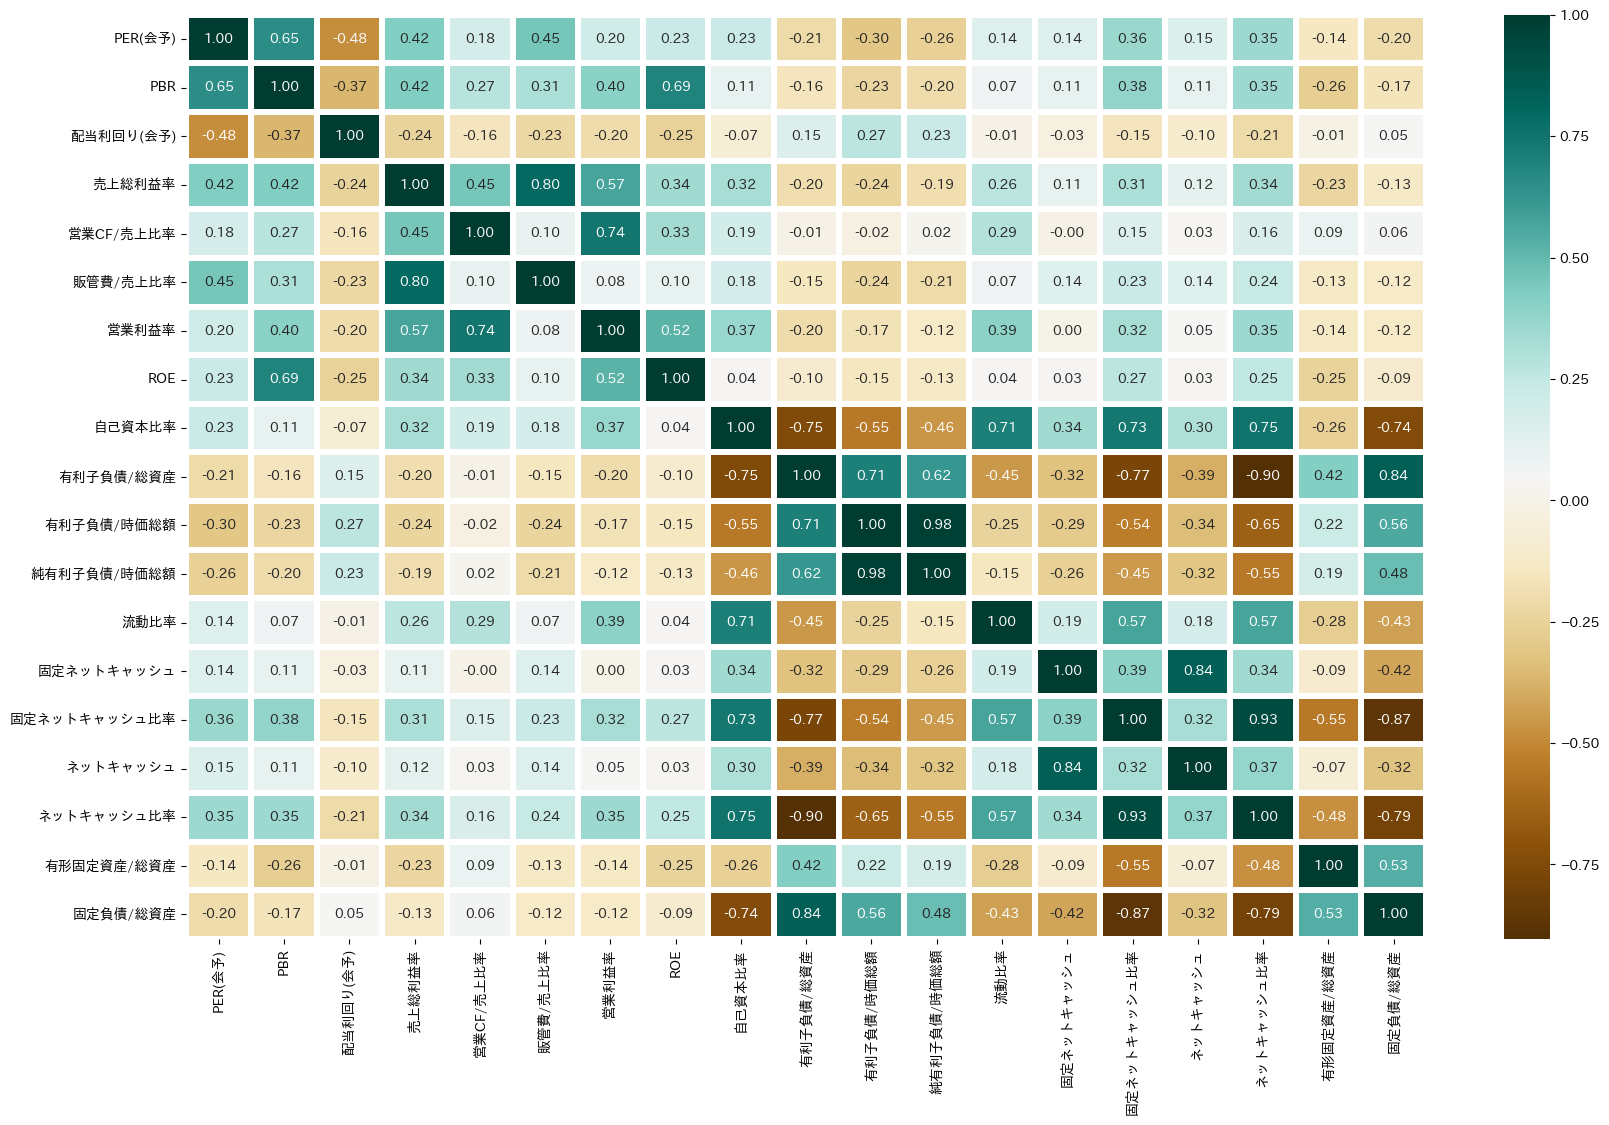

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# data内の数値列間の相関係数を'corr'に代入
corr = sub_df.corr()

plt.figure(figsize = (20, 12))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4,annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

## X, yに分割

In [19]:
sub_df.shape

(355, 19)

In [20]:
r_df.shape

(390, 21)

In [21]:
r_df.head()

,銘柄コード,会社名,PER(会予),PBR,配当利回り(会予),売上総利益率,営業CF/売上比率,販管費/売上比率,営業利益率,ROE,...,有利子負債/総資産,有利子負債/時価総額,純有利子負債/時価総額,流動比率,固定ネットキャッシュ,固定ネットキャッシュ比率,ネットキャッシュ,ネットキャッシュ比率,有形固定資産/総資産,固定負債/総資産
0,2914,本たばこ産業,17.7,2.1,4.3,55.3,20.0,46.4,10.3,4.8,...,20.6,21.7,6.6,166.5,-1288831.0,-15.396873,-642221.0,-7.672220,10.843735,28.353530
2,6098,リクルートHD,30.4,6.8,0.3,57.5,15.7,44.5,11.8,19.7,...,6.9,1.6,5.5,203.5,532924.0,18.321158,671066.0,23.070280,1.995366,11.650480
3,6501,立製作所,23.7,2.9,0.0,28.8,12.0,18.9,9.9,10.5,...,6.3,5.0,0.2,111.7,-479309.0,-3.607947,28944.0,0.217873,10.098275,10.128490
4,6758,ソニーG,20.8,2.7,0.0,28.2,12.2,19.1,10.7,11.9,...,5.8,9.3,2.5,68.2,-13888594.0,-38.588489,403754.0,1.121802,4.242043,45.512195
6,7011,三菱重工業,39.1,4.0,0.8,20.0,7.1,14.9,NaN,9.5,...,0.0,0.0,6.3,120.1,-476059.0,-6.975004,542003.0,7.941186,13.701400,14.916189


In [22]:
r_df.columns

Index(['銘柄コード', '会社名', 'PER(会予)', 'PBR', '配当利回り(会予)', '売上総利益率', '営業CF/売上比率',
       '販管費/売上比率', '営業利益率', 'ROE', '自己資本比率', '有利子負債/総資産', '有利子負債/時価総額',
       '純有利子負債/時価総額', '流動比率', '固定ネットキャッシュ', '固定ネットキャッシュ比率', 'ネットキャッシュ',
       'ネットキャッシュ比率', '有形固定資産/総資産', '固定負債/総資産'],
      dtype='object')

In [23]:

# X =  PER、売上総利益率, 営業利益率, ROE, 固定ネットキャッシュ比率
r_df = r_df[['銘柄コード', '会社名', 'PER(会予)','ROE',
             '固定ネットキャッシュ比率', 'PBR', '自己資本比率',
             '有形固定資産/総資産', 'ネットキャッシュ比率']]

r_df.head()

,銘柄コード,会社名,PER(会予),ROE,固定ネットキャッシュ比率,PBR,自己資本比率,有形固定資産/総資産,ネットキャッシュ比率
0,2914,本たばこ産業,17.7,4.8,-15.396873,2.1,45.0,10.843735,-7.672220
2,6098,リクルートHD,30.4,19.7,18.321158,6.8,61.8,1.995366,23.070280
3,6501,立製作所,23.7,10.5,-3.607947,2.9,44.0,10.098275,0.217873
4,6758,ソニーG,20.8,11.9,-38.588489,2.7,22.7,4.242043,1.121802
6,7011,三菱重工業,39.1,9.5,-6.975004,4.0,34.2,13.701400,7.941186


In [24]:
r_df.shape

(390, 9)

In [25]:
r_df.isna().sum()

銘柄コード           0
会社名             0
PER(会予)         0
ROE             7
固定ネットキャッシュ比率    0
PBR             0
自己資本比率          0
有形固定資産/総資産      0
ネットキャッシュ比率      0
dtype: int64

In [26]:
r_df.dropna(inplace=True)
company_names = r_df[['銘柄コード', '会社名']]

r_df = r_df.drop(columns=['銘柄コード', '会社名'])

r_df.shape

(383, 7)

In [27]:
company_names.shape

(383, 2)

In [28]:
r_df.head()

,PER(会予),ROE,固定ネットキャッシュ比率,PBR,自己資本比率,有形固定資産/総資産,ネットキャッシュ比率
0,17.7,4.8,-15.396873,2.1,45.0,10.843735,-7.672220
2,30.4,19.7,18.321158,6.8,61.8,1.995366,23.070280
3,23.7,10.5,-3.607947,2.9,44.0,10.098275,0.217873
4,20.8,11.9,-38.588489,2.7,22.7,4.242043,1.121802
6,39.1,9.5,-6.975004,4.0,34.2,13.701400,7.941186


In [29]:
X = r_df[['PER(会予)', 'ROE', '自己資本比率', '固定ネットキャッシュ比率']]
# X = r_df.drop(columns=['PBR', '売上総利益率', '自己資本比率'])
y = r_df['PBR']

corr = r_df[['PER(会予)', 'ROE', '自己資本比率', '固定ネットキャッシュ比率', 'PBR']]

In [30]:
X.shape

(383, 4)

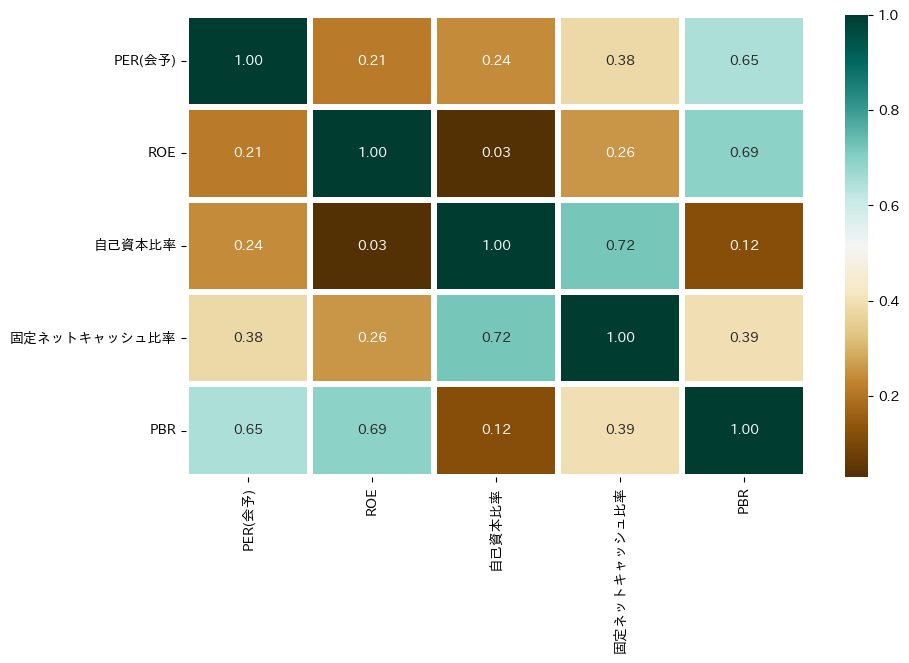

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# data内の数値列間の相関係数を'corr'に代入
corr = corr.corr()

plt.figure(figsize = (10, 6))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4,annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

## モデル構築

### パラメータ探索（グリッドサーチ）

In [32]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# パイプラインの構築（スケーリング + XGBoost回帰）
pipeline = make_pipeline(
    StandardScaler(),
    XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0)
)

# ハイパーパラメータグリッド（XGBRegressorのパラメータに合わせて記述）
param_grid = {
    'xgbregressor__max_depth': [3, 5, 7],
    'xgbregressor__learning_rate': [0.01, 0.1, 0.3],
    'xgbregressor__n_estimators': [100, 200, 300],
    'xgbregressor__subsample': [0.7, 0.9, 1.0],
    'xgbregressor__colsample_bytree': [0.7, 0.9, 1.0],
    'xgbregressor__reg_alpha': [0, 0.1, 1],
    'xgbregressor__reg_lambda': [1, 5, 10]
}

# グリッドサーチ設定（5分割交差検証でR²スコアを評価指標とする）
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# モデルをデータにフィット（X: 特徴量, y: 目的変数）
grid_search.fit(X, y)

# 最良モデルとそのスコアを表示
print("ベストスコア（R²）:", grid_search.best_score_)
print("ベストパラメータ:")
for key, value in grid_search.best_params_.items():
    print(f"  {key}: {value}")


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
ベストスコア（R²）: 0.8081309027464801
ベストパラメータ:
  xgbregressor__colsample_bytree: 0.9
  xgbregressor__learning_rate: 0.1
  xgbregressor__max_depth: 3
  xgbregressor__n_estimators: 300
  xgbregressor__reg_alpha: 0
  xgbregressor__reg_lambda: 1
  xgbregressor__subsample: 0.7


### 交差検証

In [33]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# GridSearchCVの結果から得られた最良パラメータをここに記述（例として記入）
best_params = {
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 300,
    'subsample': 0.7,
    'colsample_bytree': 0.9,
    'reg_alpha': 0,
    'reg_lambda': 1,
}

# 最良パラメータを使ったXGBoost回帰モデルとスケーラーのパイプライン
pipeline = make_pipeline(
    StandardScaler(),
    XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        verbosity=0,
        **best_params
    )
)

# 1. 決定係数 (R²)
r2_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
print('決定係数 (R²) scores: {}'.format(r2_scores))
print('平均決定係数 (R²): {:.4f}'.format(np.mean(r2_scores)))

# 2. 平均二乗誤差 (MSE)
mse_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -mse_scores  # 負の値を正に戻す
print('平均二乗誤差 (MSE) scores: {}'.format(mse_scores))
print('平均二乗誤差 (MSE): {:.4f}'.format(np.mean(mse_scores)))

# 3. 平均絶対誤差 (MAE)
mae_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
mae_scores = -mae_scores
print('平均絶対誤差 (MAE) scores: {}'.format(mae_scores))
print('平均絶対誤差 (MAE): {:.4f}'.format(np.mean(mae_scores)))


決定係数 (R²) scores: [0.889464   0.8314696  0.79567395 0.76319155 0.76085542]
平均決定係数 (R²): 0.8081
平均二乗誤差 (MSE) scores: [0.63516271 1.35407197 0.48960024 1.65581094 0.71584222]
平均二乗誤差 (MSE): 0.9701
平均絶対誤差 (MAE) scores: [0.41655558 0.53881528 0.46821672 0.54698084 0.50010061]
平均絶対誤差 (MAE): 0.4941


### 予測モデル構築

In [34]:
company_names_col = company_names[['銘柄コード','会社名']]

company_names_col

,銘柄コード,会社名
0,2914,本たばこ産業
2,6098,リクルートHD
3,6501,立製作所
4,6758,ソニーG
6,7011,三菱重工業
...,...,...
493,7451,三菱食品
494,8242,エイチ･ツー･オーリテイリング
495,8273,イズミ
496,9744,メイテックGHD


In [35]:
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# GridSearchCVの結果から得られた最良パラメータをここに記述（例として記入）
best_params = {
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 300,
    'subsample': 0.7,
    'colsample_bytree': 0.9,
    'reg_alpha': 0,
    'reg_lambda': 1,
}

# 最良パラメータを使ったXGBoost回帰モデルとスケーラーのパイプライン
pipe_lr = make_pipeline(
    StandardScaler(),
    XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        verbosity=0,
        **best_params
    )
)

sc = StandardScaler()
X_sc = sc.fit_transform(X)
pipe_lr.fit(X_sc, y)
lr_pred = pipe_lr.predict(X_sc)


r_df['予測PBR'] = lr_pred
r_df['予測誤差'] = r_df['PBR'] - lr_pred
r_df['PBRレシオ'] =  lr_pred / r_df['PBR']
r_df[['銘柄コード', '会社名']] = company_names_col


r_df.head(10)

,PER(会予),ROE,固定ネットキャッシュ比率,PBR,自己資本比率,有形固定資産/総資産,ネットキャッシュ比率,予測PBR,予測誤差,PBRレシオ,銘柄コード,会社名
0,17.7,4.8,-15.396873,2.1,45.0,10.843735,-7.672220,1.842548,0.257452,0.877404,2914,本たばこ産業
2,30.4,19.7,18.321158,6.8,61.8,1.995366,23.070280,6.782948,0.017052,0.997492,6098,リクルートHD
3,23.7,10.5,-3.607947,2.9,44.0,10.098275,0.217873,2.636664,0.263336,0.909195,6501,立製作所
4,20.8,11.9,-38.588489,2.7,22.7,4.242043,1.121802,2.684848,0.015152,0.994388,6758,ソニーG
6,39.1,9.5,-6.975004,4.0,34.2,13.701400,7.941186,3.776355,0.223645,0.944089,7011,三菱重工業
7,8.1,13.8,-21.221911,1.0,37.9,16.271369,-33.054896,0.959808,0.040192,0.959808,7203,トヨタ自動車
9,11.1,15.3,-25.157451,1.7,38.0,14.744014,-44.903221,1.687767,0.012233,0.992804,8001,伊藤忠商事
10,17.1,29.6,12.315169,5.3,70.1,16.820609,15.850838,5.024312,0.275688,0.947983,8035,東京エレクトロン
11,15.0,10.1,-18.245809,1.1,43.6,13.365264,-32.942835,1.292670,-0.192670,1.175155,8058,三菱商事
15,11.4,12.6,-28.661270,1.2,33.2,34.204582,0.278489,1.496488,-0.296488,1.247073,9432,本電信電話


### モデル評価

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_lr = XGBRegressor()
xgb_lr.fit(X_train, y_train)
xgb_pred = xgb_lr.predict(X_test)


# 評価指標の表示
print("決定係数 (R²):", r2_score(y_test, xgb_pred))
print("平均二乗誤差 (MSE):", mean_squared_error(y_test, xgb_pred))
print("平均絶対誤差 (MAE):", mean_absolute_error(y_test, xgb_pred))

決定係数 (R²): 0.8374279116442693
平均二乗誤差 (MSE): 1.3784111446006684
平均絶対誤差 (MAE): 0.5354532886635172


### 特徴量重要度（Feature-Importance）

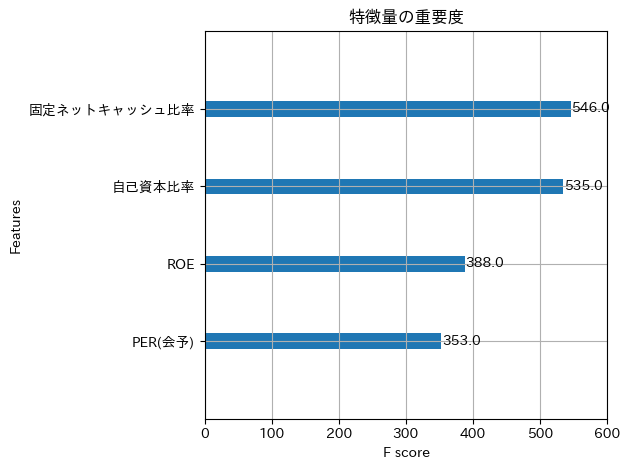

In [37]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# パイプラインから XGBRegressor モデルを取り出す
xgb_model = pipe_lr.named_steps['xgbregressor']

# 特徴量の重要度を可視化
plot_importance(xgb_model)
plt.yticks(range(len(X.columns)), X.columns)
plt.title('特徴量の重要度')
plt.tight_layout()
plt.show()

## データを入力して予測

### 実績(ポートフォリオ)

In [53]:
import pandas as pd
import numpy as np

# 会社名
company_names = ['明豊ファシリティワークス', 'AREHD', '湖北工業', 'アドバンテッジリスクマネジメント', '相鉄HD',
                 'ナレルグループ', '岡村製作所', 'NexTone', 'グリーンズ', 'インテG']

# 特徴量データ 予想PER, ROE, 自己資本比率, 固定ネットキャッシュ比率,)
X_new = np.array([
    [11.9, 14.8, 69.5, 0],      # 明豊ファシリティワークス
    [8.4, 11.3, 25.8, -7],       # AREHD
    [16.9, 13.9, 83.3, 14.23],      # 湖北工業
    [12.2, 19.03, 44.8, -1.64],   # アドバンテッジリスクマネジメント
    [10.0, 12.3, 24.0, -54.81],   # 相鉄HD
    [8.3, 16.2, 58.7, 2.56],    # ナレルグループ
    [9.2, 11.9, 64, -7.74], # 岡村製作所
    [15.8, 25.22, 32.1, 61.25], # NexTone
    [6.7, 30, 29.4, -9.09], # グリーンズ
    [16.4, 30, 94.1, 89.38], # インテG
])

# 特徴量名 (4つに合わせる)
feature_names = list(X.columns)

# 標準化 (既存のsc = StandardScalerを使う)
X_new_sc = sc.transform(X_new)

# PBR予測
lr_pred = pipe_lr.predict(X_new_sc)

# データフレーム化
result_df = pd.DataFrame(X_new, columns=feature_names)
result_df['会社名'] = company_names
result_df['予測PBR'] = lr_pred

# 列の順序を並べ替え（会社名を先頭）
result_df = result_df[['会社名'] + feature_names + ['予測PBR']]

# 表示
result_df


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,会社名,PER(会予),ROE,自己資本比率,固定ネットキャッシュ比率,予測PBR
0,明豊ファシリティワークス,11.9,14.80,69.5,0.00,1.485771
1,AREHD,8.4,11.30,25.8,-7.00,0.792710
2,湖北工業,16.9,13.90,83.3,14.23,1.646355
3,アドバンテッジリスクマネジメント,12.2,19.03,44.8,-1.64,1.683274
4,相鉄HD,10.0,12.30,24.0,-54.81,1.141529
5,ナレルグループ,8.3,16.20,58.7,2.56,1.658102
6,岡村製作所,9.2,11.90,64.0,-7.74,0.984753
7,NexTone,15.8,25.22,32.1,61.25,4.876702
8,グリーンズ,6.7,30.00,29.4,-9.09,2.303090
9,インテG,16.4,30.00,94.1,89.38,5.370732


### 予想（ポートフォリオ）

In [56]:
import pandas as pd
import numpy as np

# 会社名
company_names = ['明豊ファシリティワークス', 'AREHD', '湖北工業', 'アドバンテッジリスクマネジメント', '相鉄HD',
                 'ナレルグループ', 'NexTone', 'グリーンズ', 'インテG']

# 特徴量データ 予想PER, ROE, 自己資本比率, 固定ネットキャッシュ比率,)
X_new = np.array([
    [15, 17, 69.5, 0],      # 明豊ファシリティワークス
    [12, 15, 50, -7],       # AREHD
    [16.9, 13.9, 83.3, 14.23],      # 湖北工業
    [17.5, 23, 44.8, -1.64],   # アドバンテッジリスクマネジメント
    [10.0, 12.3, 24.0, -54.81],   # 相鉄HD
    [15, 16.2, 58.7, 2.56],    # ナレルグループ
    [25, 25.22, 32.1, 61.25], # NexTone
    [12, 30, 29.4, -9.09], # グリーンズ
    [20, 30, 94.1, 89.38], # インテG
])

# 特徴量名 (4つに合わせる)
feature_names = list(X.columns)

# 標準化 (既存のsc = StandardScalerを使う)
X_new_sc = sc.transform(X_new)

# PBR予測
lr_pred = pipe_lr.predict(X_new_sc)

# データフレーム化
result_df = pd.DataFrame(X_new, columns=feature_names)
result_df['会社名'] = company_names
result_df['予測PBR'] = lr_pred

# 列の順序を並べ替え（会社名を先頭）
result_df = result_df[['会社名'] + feature_names + ['予測PBR']]

# 表示
result_df


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,会社名,PER(会予),ROE,自己資本比率,固定ネットキャッシュ比率,予測PBR
0,明豊ファシリティワークス,15.0,17.00,69.5,0.00,2.221563
1,AREHD,12.0,15.00,50.0,-7.00,1.720167
2,湖北工業,16.9,13.90,83.3,14.23,1.646355
3,アドバンテッジリスクマネジメント,17.5,23.00,44.8,-1.64,3.486449
4,相鉄HD,10.0,12.30,24.0,-54.81,1.141529
5,ナレルグループ,15.0,16.20,58.7,2.56,2.407658
6,NexTone,25.0,25.22,32.1,61.25,7.351050
7,グリーンズ,12.0,30.00,29.4,-9.09,2.643226
8,インテG,20.0,30.00,94.1,89.38,6.387344


In [39]:
# 特徴量データ (PER(会予), ROE, 自己資本比率, 固定ネットキャッシュ比率)

X_new = np.array([
     [15.8, 20, 32.1, 61.25],  # NexTone(ROE抑えめ)
     [18.2, 10.4, 55.4, 36.96], # 日水コン
     [17.8, 15.2, 76.8, 48.88], # インターメスティック
     [10.2, 7.1, 48.2, 10.72], # ワッツ
     [19.6, 2.3, 80.3, 43.73], # はてな
     [12.4, 15.3, 79.5, 19.38], # アイティーフォー
     [6.6, 6.9, 41.5, -35.82], # アサックス
     [6.7, 40, 36.6, -3.96], # グリーンズ
     [14.4, 15.5, 82, 63.36], # 福井コンピュータHD
     [8.5, 14.8, 45, 13.34], # CSS HD
     [13.7, 10.5, 71.1, 35.82], # ウィッツ
     [6.7, 35, 29.4, -9.09],
     [16, 11.8, 47.9, -10.01], # エリアリンク
     
])


X_new_sc = sc.transform(X_new)

lr_pred = pipe_lr.predict(X_new_sc)

lr_pred

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.1137075, 2.1808987, 3.2529197, 1.0958973, 2.0342023, 1.4099857,
       0.4575522, 3.7916565, 1.4433291, 1.4798715, 1.9507859, 3.785083 ,
       2.3292398], dtype=float32)

In [52]:
# 特徴量データ (PER(会予), ROE, 自己資本比率, 固定ネットキャッシュ比率)

X_new = np.array([
     [17, 11.8, 17.2, -37.14],  # NexTone(ROE抑えめ)
     [15.6, 20, 75, 24.47], # 湖北工業(24.12通期)
     [15.6, 15, 50, 40], # 湖北工業（改善後）
     [12.2, 19.03, 44.8, -1.64],
     [6.7, 30, 29.4, -9.09], # グリーンズ
     [6.7, 30, 45, 50],
     [12.2, 19.03, 44.8, -1.64], 
     [36, 39, 52.9, 36.29],
     [15.6, 23.62, 54.9, -9.38], # カチタス
     [7.4, 8.6, 34.6, -37.35], # コーナン商事
     [16.2, 6.8, 69.8, 7.23], # スカパー
     [17, 14.3, 35.7, 0.23], # 大成建設
     [12.9, 10, 36.4, -3.62], # 鹿島建設
     [15, 6.5, 49.2, -18.56], # 日本製鐵
     [10.9, 13.5, 31.2, -20.69], # ANA HD
     [15, 17, 69.5, 0],
])


X_new_sc = sc.transform(X_new)

lr_pred = pipe_lr.predict(X_new_sc)

lr_pred

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([ 1.91872   ,  3.1266606 ,  2.4467902 ,  1.6832741 ,  2.3030896 ,
        4.794237  ,  1.6832741 , 13.457944  ,  3.1119952 ,  0.78635705,
        1.0920112 ,  2.1877532 ,  1.2912678 ,  1.0501323 ,  1.2232054 ,
        2.2215629 ], dtype=float32)

In [45]:
3 / 2.5

1.2

In [41]:
# 特徴量データ (PER(会予), ROE, 自己資本比率, 固定ネットキャッシュ比率)

X_new = np.array([
     [20.2, 23.2, 76.4, 56.50], # 日本M&Aセンター
     [15.8, 11, 82.9, 85.1], # M&Aキャピタルパートナーズ
     [21.1, 54.6, 82, 85.12], # M&A総研HD
     [16.4, 30, 94.1, 89.38], # インテG
     [12.5, 26.8, 85.1, 77.82], # ストライク
     [11, 16, 76.8, 38.48], # 山田コンサルティング
])


X_new_sc = sc.transform(X_new)

lr_pred = pipe_lr.predict(X_new_sc)

lr_pred

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([6.2209125, 1.5987628, 8.736777 , 5.370732 , 3.6847708, 1.9014528],
      dtype=float32)

In [42]:
df = pd.DataFrame({
    'name' : ['日本M&Aセンター', 'M&Aキャピタルパートナーズ', 'M&A総研', 'インテG', 'ストライク', '山田コンサルティング'],
    'ROE' : [23.2, 11.0, 54.6, 35.6, 26.8, 16.0],
    'PER' : [20.2, 15.8, 21.1, 16.4, 12.5, 11.0],
    'PBR': [4.7, 2.1, 7.9, 2.7, 3.8, 1.7]
})

df['予測PBR'] = lr_pred

df['PBR-Ratio'] = df['予測PBR'] / df['PBR']

df

,name,ROE,PER,PBR,予測PBR,PBR-Ratio
0,日本M&Aセンター,23.2,20.2,4.7,6.220912,1.323598
1,M&Aキャピタルパートナーズ,11.0,15.8,2.1,1.598763,0.761316
2,M&A総研,54.6,21.1,7.9,8.736777,1.105921
3,インテG,35.6,16.4,2.7,5.370732,1.989160
4,ストライク,26.8,12.5,3.8,3.684771,0.969677
5,山田コンサルティング,16.0,11.0,1.7,1.901453,1.118502
